In [32]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import simps
import pandas as pd
import sys
import math
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

In [45]:
xy = np.random.random((1000, 2))
xy = (xy - xy.min(axis=0)) / (xy.max(axis=0) - xy.min(axis=0))
def fxy(x,y):
    return (-np.sin(y*2) + np.cos(x*2)*2 + 2*np.cos(x)*np.sin(x*2))
z = fxy(xy[:,0:1], xy[:,1:2])
xyz = np.append(xy,z, axis=1)

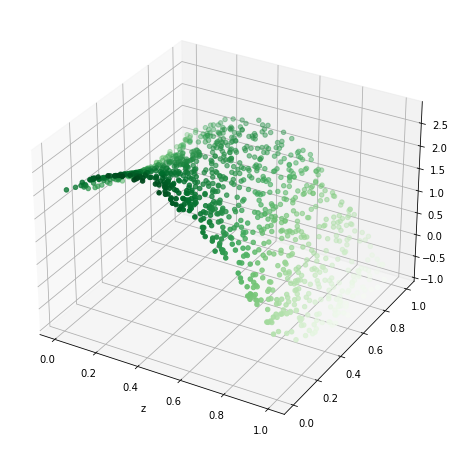

In [55]:
df = pd.DataFrame(xyz)
## TODO: change this to a specified number instead of meter precision ?
df.values[:, :2] = np.round(df.values[:, :2], 2)
df.columns = ["x", "y", "z"]

plt.figure(figsize=(8, 8))

ax = plt.axes(projection="3d")
ax.scatter3D(
    df.values[:, 0], df.values[:, 1], df.values[:, 2], c=df.values[:, 2], cmap="Greens"
)
plt.xlabel("x")
plt.xlabel("z")
plt.show()

/home/CGaydon/anaconda3/envs/lidar_pac/lib/python3.9/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: A theoretically impossible result when finding a smoothing spline
with fp = s. Probable causes: s too small or badly chosen eps.
(abs(fp-s)/s>0.001)
	kx,ky=5,5 nx,ny=32,32 m=1000 fp=94.492165 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


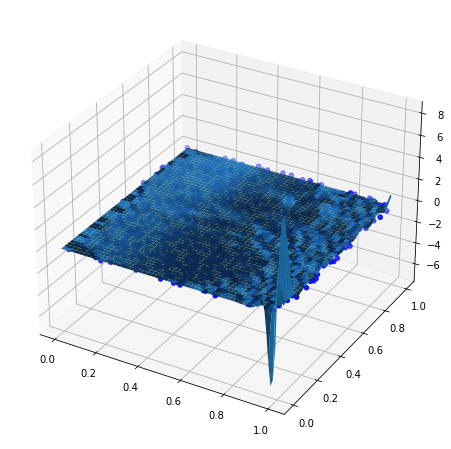

In [57]:
# Learn the approximate DTM
# Linar interpolation is more robust that cubic on the edges.

xzmin = df.groupby(["x","y"])["z"].min()+0.5
xzmin = xzmin.reset_index()
f = interpolate.interp2d(df.values[:,0], df.values[:,1], df.values[:,2], kind='quintic')
x_steps = (np.arange(0, 1, 0.01))
y_steps = (np.arange(0, 1, 0.01))
zz_coord = f(x_steps,y_steps)

# xx_coord = xx.flatten()
# yy_coord = yy.flatten()
# cf. https://stackoverflow.com/questions/47087109/evaluate-the-output-from-scipy-2d-interpolation-along-a-curve
# zz_coord = interpolate.dfitpack.bispeu(f.tck[0], f.tck[1], f.tck[2], f.tck[3], f.tck[4], xx_coord, yy_coord)[0]


# Visualize
plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.scatter3D(df.values[:,0], df.values[:,1], df.values[:,2], c= "b", cmap='Greens');
xx, yy = np.meshgrid(x_steps, y_steps)
ax.plot_surface(xx, yy, zz_coord);

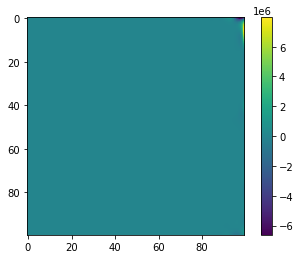

In [58]:
plt.imshow(zz_coord)
plt.colorbar()

In [37]:
# normalize
norm_z = Z - zz_coord

NameError: name 'Z' is not defined

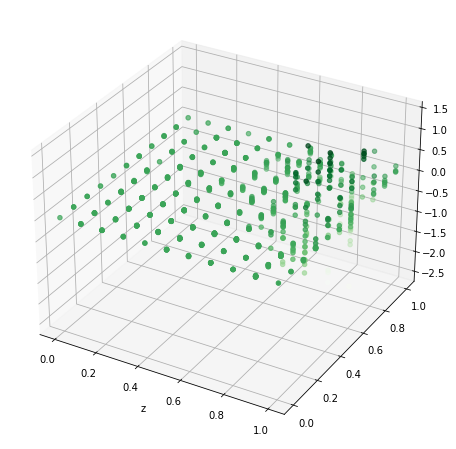

In [59]:
xyz_ = xyz.copy()
xyz_[:,2] = xyz[:,2] - interpolate.dfitpack.bispeu(f.tck[0], f.tck[1], f.tck[2], f.tck[3], f.tck[4], xyz[:,0], xyz[:,1])[0]
df = pd.DataFrame(xyz_)
## TODO: change this to a specified number instead of meter precision ?
df.values[:, :2] = np.round(df.values[:, :2], 1)
df.columns = ["x", "y", "z"]

plt.figure(figsize=(8, 8))

ax = plt.axes(projection="3d")
ax.scatter3D(
    df.values[:, 0], df.values[:, 1], df.values[:, 2], c=df.values[:, 2], cmap="Greens"
)
plt.xlabel("x")
plt.xlabel("z")
plt.show()

In [56]:
# NEED FOR SMOOTHER INTERPOLATION s>0 in lass scipy.interpolate.RectBivariateSpline
https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.RectBivariateSpline.html#scipy.interpolate.RectBivariateSpline